# Weatherpy

In [6]:
# Dependencies and setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_key import weather_api_key
temp_units = "imperial"

# Incorporate citipy to determine latitude and longitude
from citi import citipy

# output File (CSV)
output_data_file = "output_data/weather_df.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


# Generate Cities List

In [7]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
   
    # If city is unique, then add city to list
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count
len(cities)

616

In [24]:
# Perform API Calls
# perform weather check on each city

base_url = "http://api.openweathermap.org/data/2.5/weather?"
query = base_url + "appid=" + weather_api_key + "&units=imperial" + "&q=" + city

# set lists for dataframe
record = 0
city_name = []
country = []
dates = []
cloudinesses = []
humidities = []
lats = []
lngs = []
max_temps = []
wind_speeds = []



# loop for creating dataframe
for city in cities:
    record +=1
    base_url = "http://api.openweathermap.org/data/2.5/weather?"
    query = base_url + "appid=" + weather_api_key + "&units=imperial" + "&q=" + city
    response = requests.get(query)
    response_json = response.json()
    if (str(response) == "<Response [200]>"): 
        print(f"Processing Record {record}: {city}")
        city_name.append(response_json["name"])
        cloudinesses.append(response_json["clouds"]["all"])
        country.append(response_json["sys"]["country"])
        dates.append(response_json["dt"])
        humidities.append(response_json["main"]["humidity"])
        lats.append(response_json["coord"]["lat"])
        lngs.append(response_json["coord"]["lon"])
        max_temps.append(response_json["main"]["temp_max"])
        wind_speeds.append(response_json["wind"]["speed"])
    else:
        print("Can't find city, skipping...")
    
    time.sleep(1)
    
print("-------------------------\nData Retrieval completed\n-----------------")
    
    

Processing Record 1: rikitea
Processing Record 2: barrow
Processing Record 3: horizontina
Processing Record 4: upata
Can't find city, skipping...
Processing Record 6: kingaroy
Processing Record 7: labuhan
Processing Record 8: pacific grove
Processing Record 9: grootfontein
Processing Record 10: busselton
Can't find city, skipping...
Can't find city, skipping...
Processing Record 13: hasaki
Processing Record 14: port alfred
Processing Record 15: jacareacanga
Processing Record 16: torbay
Processing Record 17: costinesti
Processing Record 18: port elizabeth
Processing Record 19: yangambi
Processing Record 20: liverpool
Processing Record 21: port macquarie
Processing Record 22: ushuaia
Processing Record 23: nikolskoye
Processing Record 24: botucatu
Processing Record 25: beloha
Processing Record 26: bonthe
Processing Record 27: margate
Processing Record 28: albany
Processing Record 29: georgetown
Processing Record 30: amapa
Processing Record 31: hermanus
Processing Record 32: carutapera
Pro

Processing Record 260: hella
Processing Record 261: hongjiang
Processing Record 262: varzea grande
Processing Record 263: ugleuralskiy
Processing Record 264: santa maria
Processing Record 265: camacha
Processing Record 266: lagoa
Processing Record 267: yerofey pavlovich
Processing Record 268: basco
Processing Record 269: grand gaube
Processing Record 270: galbshtadt
Processing Record 271: salalah
Processing Record 272: shitanjing
Processing Record 273: khandyga
Processing Record 274: sitka
Processing Record 275: gat
Processing Record 276: xuddur
Processing Record 277: uga
Processing Record 278: hami
Can't find city, skipping...
Processing Record 280: aklavik
Processing Record 281: coolum beach
Processing Record 282: aquiraz
Processing Record 283: kozan
Processing Record 284: shache
Processing Record 285: kavieng
Processing Record 286: praxedis guerrero
Processing Record 287: finnsnes
Processing Record 288: ouegoa
Processing Record 289: rocha
Processing Record 290: acapulco
Processing R

Processing Record 518: srandakan
Processing Record 519: kaeo
Processing Record 520: zhaodong
Processing Record 521: banswada
Processing Record 522: puka
Can't find city, skipping...
Processing Record 524: tchaourou
Processing Record 525: kuusamo
Processing Record 526: grand-santi
Processing Record 527: lewiston
Processing Record 528: clarence town
Processing Record 529: kenai
Processing Record 530: tigil
Can't find city, skipping...
Processing Record 532: port hedland
Processing Record 533: viedma
Processing Record 534: kaitangata
Processing Record 535: chibuto
Processing Record 536: itaueira
Processing Record 537: jonkoping
Processing Record 538: baykit
Processing Record 539: kouroussa
Processing Record 540: yar-sale
Processing Record 541: rio grande
Processing Record 542: marawi
Processing Record 543: omboue
Processing Record 544: yonezawa
Processing Record 545: lagos de moreno
Processing Record 546: zaltan
Processing Record 547: cockburn town
Processing Record 548: altus
Processing 

In [25]:
# convert to dataframe

weather_dict = {
    "City" : city_name, 
    "Cloudiness" : cloudinesses,
    "Country" : country,
    "Date": dates,
    "Humidity" : humidities,
    "Lat" : lats,
    "Lng" : lngs,
    "Max Temp" : max_temps,
    "Wind Speed" : wind_speeds
    
}

weather_df = pd.DataFrame(weather_dict)
weather_df

City  Cloudiness Country        Date  Humidity    Lat     Lng  \
0        Rikitea          55      PF  1583361189        72 -23.12 -134.97   
1         Barrow           1      US  1583360386        93  71.29 -156.79   
2    Horizontina          13      BR  1583361192        49 -27.63  -54.31   
3          Upata          39      VE  1583361193        69   8.01  -62.40   
4       Kingaroy          40      AU  1583361195        78 -26.53  151.83   
..           ...         ...     ...         ...       ...    ...     ...   
564       Palwal          90      IN  1583361938       100  28.15   77.33   
565    Belyy Yar          34      RU  1583361940        73  53.60   91.39   
566       Yulara           0      AU  1583361941        55 -25.24  130.99   
567         Brae          85      GB  1583361942        86  60.40   -1.35   
568        Hanko         100      FI  1583361943        90  59.83   22.95   

     Max Temp  Wind Speed  
0       77.59       18.32  
1      -29.20        3.36  
2       71.28        2.39  
3       76.24        9.53  
4       78.01        8.05  
..        ...         ...  
564     60.80        8.05  
565     24.80       11.18  
566     62.60        4.70  
567     41.00       11.41  
568     37.00       11.99  

[569 rows x 9 columns]

In [26]:
# save to outputdata as csv file
weather_df.to_csv(output_data_file)

weather_df.count()

City          569
Cloudiness    569
Country       569
Date          569
Humidity      569
Lat           569
Lng           569
Max Temp      569
Wind Speed    569
dtype: int64

# Latitude vs. Temperature Plot

This plot exhibits the relationship between latittude and nax temperature in selected cities.
It tells us that the closer a city is to the equator, the higher the temperature. 

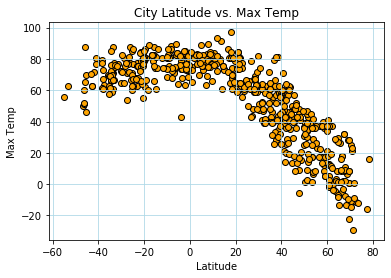

In [39]:
# plot the data
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], edgecolors = "black", facecolors = "orange")
plt.title("City Latitude vs. Max Temp")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.grid(b=True, which = "major", axis = "both", linestyle = "-", color="lightblue")
plt.savefig("Images/fig1.png")
plt.show()

# Latitude vs. Humidity Plot
This plot shows the relationship between latittude and humidity. 
It shows that cities south of the equator are more humid than the north of equator.

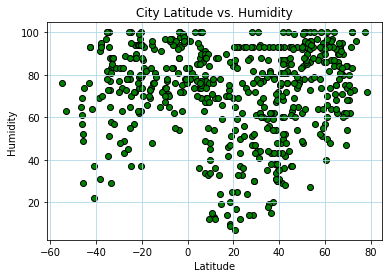

In [33]:
# plot the data
plt.scatter(weather_df["Lat"], weather_df["Humidity"], edgecolors = "black", facecolors = "green")
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(b=True, which = "major", axis = "both", linestyle = "-", color="lightblue")
plt.savefig("Images/fig2.png")
plt.show()

# Latitude vs. Cloudiness Plot
Cloudiness doesn't seem to be affected by the equator.  There is no vivid relationship.

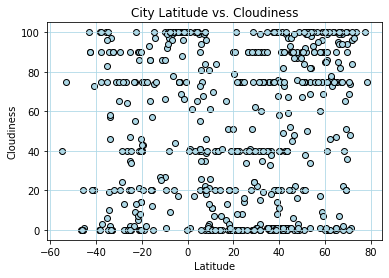

In [34]:
# plot the data
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], edgecolors = "black", facecolors = "lightblue")
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(b=True, which = "major", axis = "both", linestyle = "-", color="lightblue")
plt.savefig("Images/fig3.png")
plt.show()

# Latitude vs. Wind Speed Plot
The below plot shows the relationship between latitude and wind speed.  It exhibits that southern parts are more windy than northern parts.

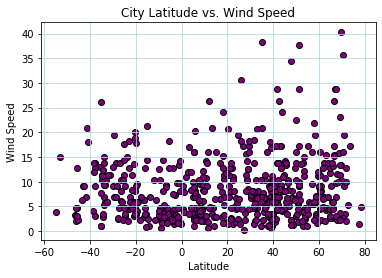

In [35]:
# plot the data
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], edgecolors = "black", facecolors = "purple")
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid(b=True, which = "major", axis = "both", linestyle = "-", color="lightblue")
plt.savefig("Images/fig4.png")
plt.show()

# Linear Regression


In [37]:
# Create Northern and Southern Hemisphere DataFrames

#Northern Hemisphere (Lat > 0)
weather_df_north = weather_df[weather_df['Lat'] >= 0]

#Southern Hemisphere (Lat < 0)
weather_df_south = weather_df[weather_df['Lat'] < 0]

# Northern Hemisphere - Max Temp vs. Latitude Linear Regression

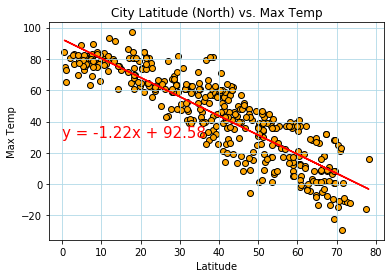

r^2: -0.8861404686887961


In [45]:
#setup linear regression and line equation
x_values = weather_df_north['Lat']
y_values = weather_df_north['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
reg_values = x_values * slope + intercept
line = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


#plot data
lat_temp_regress = plt.scatter(x_values,y_values,marker='o',edgecolors='black', facecolors = "orange")
plt.plot(x_values,reg_values,"r-")
plt.annotate(line, xy=(0,30),fontsize=15,color='red')
plt.title("City Latitude (North) vs. Max Temp")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.grid(b=True, which = "major", axis = "both", linestyle = "-", color="lightblue")
plt.savefig("Images/fig5.png")
plt.show()

#r2
print(f'r^2: {rvalue}')

# Southern Hemisphere - Max Temp vs. Latitude Linear Regression

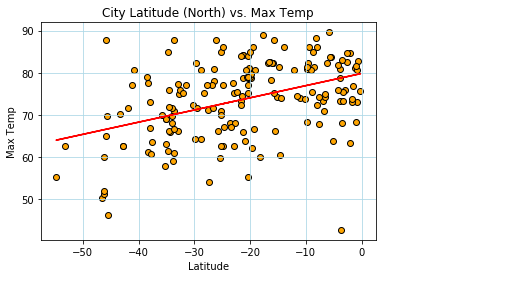

r^2: 0.4180174406930831


In [49]:
#setup linear regression and line equation
x_values = weather_df_south['Lat']
y_values = weather_df_south['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
reg_values = x_values * slope + intercept
line = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


#plot data
lat_temp_regress = plt.scatter(x_values,y_values,marker='o',edgecolors='black', facecolors = "orange")
plt.plot(x_values,reg_values,"r-")
plt.annotate(line, xy=(0,30),fontsize=15,color='red')
plt.title("City Latitude (North) vs. Max Temp")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.grid(b=True, which = "major", axis = "both", linestyle = "-", color="lightblue")
plt.savefig("Images/fig5.png")
plt.show()

#r2
print(f'r^2: {rvalue}')

# Northern Hemisphere - Humdity vs. Latitude Linear Regression

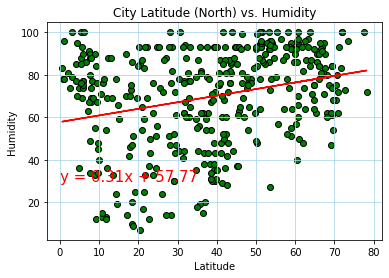

r^2: 0.2698821680324408


In [46]:
#setup linear regression and line equation
x_values = weather_df_north['Lat']
y_values = weather_df_north['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
reg_values = x_values * slope + intercept
line = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


#plot data
lat_temp_regress = plt.scatter(x_values,y_values,marker='o',edgecolors='black', facecolors = "green")
plt.plot(x_values,reg_values,"r-")
plt.annotate(line, xy=(0,30),fontsize=15,color='red')
plt.title("City Latitude (North) vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(b=True, which = "major", axis = "both", linestyle = "-", color="lightblue")
plt.savefig("Images/fig6.png")
plt.show()

#r2
print(f'r^2: {rvalue}')

# Southern Hemisphere - Humidity vs. Latitude Linear Regression

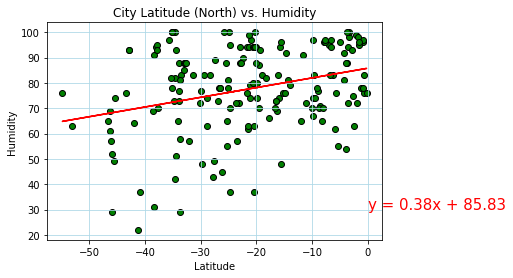

r^2: 0.3025967811534301


In [50]:
#setup linear regression and line equation
x_values = weather_df_south['Lat']
y_values = weather_df_south['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
reg_values = x_values * slope + intercept
line = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


#plot data
lat_temp_regress = plt.scatter(x_values,y_values,marker='o',edgecolors='black', facecolors = "green")
plt.plot(x_values,reg_values,"r-")
plt.annotate(line, xy=(0,30),fontsize=15,color='red')
plt.title("City Latitude (North) vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(b=True, which = "major", axis = "both", linestyle = "-", color="lightblue")
plt.savefig("Images/fig6.png")
plt.show()

#r2
print(f'r^2: {rvalue}')

# Northern Hemisphere - Cloudiness vs. Latitude Linear Regression

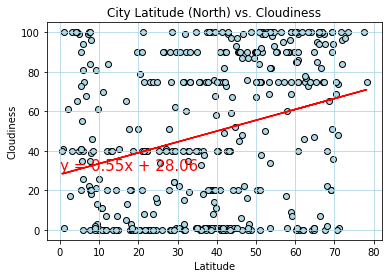

r^2: 0.28773479772625477


In [47]:
#setup linear regression and line equation
x_values = weather_df_north['Lat']
y_values = weather_df_north['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
reg_values = x_values * slope + intercept
line = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


#plot data
lat_temp_regress = plt.scatter(x_values,y_values,marker='o',edgecolors='black', facecolors = "lightblue")
plt.plot(x_values,reg_values,"r-")
plt.annotate(line, xy=(0,30),fontsize=15,color='red')
plt.title("City Latitude (North) vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(b=True, which = "major", axis = "both", linestyle = "-", color="lightblue")
plt.savefig("Images/fig7.png")
plt.show()

#r2
print(f'r^2: {rvalue}')

# Southern Hemisphere - Cloudiness vs. Latitude Linear Regression

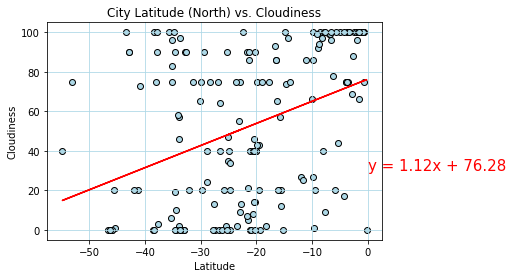

r^2: 0.38614948777711205


In [51]:
#setup linear regression and line equation
x_values = weather_df_south['Lat']
y_values = weather_df_south['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
reg_values = x_values * slope + intercept
line = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


#plot data
lat_temp_regress = plt.scatter(x_values,y_values,marker='o',edgecolors='black', facecolors = "lightblue")
plt.plot(x_values,reg_values,"r-")
plt.annotate(line, xy=(0,30),fontsize=15,color='red')
plt.title("City Latitude (North) vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(b=True, which = "major", axis = "both", linestyle = "-", color="lightblue")
plt.savefig("Images/fig7.png")
plt.show()

#r2
print(f'r^2: {rvalue}')

# Northern Hemisphere - Wind Speed vs. Latitude Linear Regression

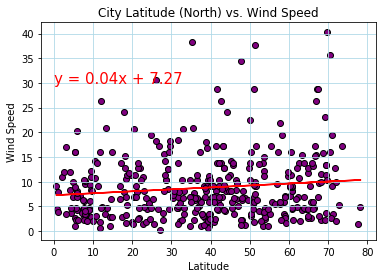

r^2: 0.12020476728574153


In [48]:
#setup linear regression and line equation
x_values = weather_df_north['Lat']
y_values = weather_df_north['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
reg_values = x_values * slope + intercept
line = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


#plot data
lat_temp_regress = plt.scatter(x_values,y_values,marker='o',edgecolors='black', facecolors = "purple")
plt.plot(x_values,reg_values,"r-")
plt.annotate(line, xy=(0,30),fontsize=15,color='red')
plt.title("City Latitude (North) vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid(b=True, which = "major", axis = "both", linestyle = "-", color="lightblue")
plt.savefig("Images/fig8.png")
plt.show()

#r2
print(f'r^2: {rvalue}')

# Southern Hemisphere - Wind Speed vs. Latitude Linear Regression

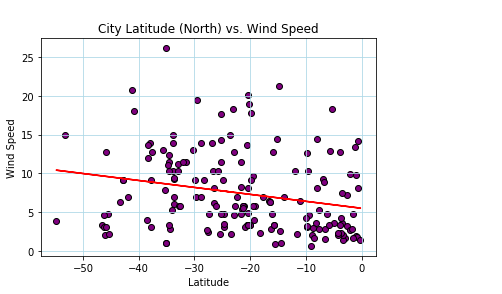

r^2: -0.23434270915471894


In [52]:
#setup linear regression and line equation
x_values = weather_df_south['Lat']
y_values = weather_df_south['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
reg_values = x_values * slope + intercept
line = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


#plot data
lat_temp_regress = plt.scatter(x_values,y_values,marker='o',edgecolors='black', facecolors = "purple")
plt.plot(x_values,reg_values,"r-")
plt.annotate(line, xy=(0,30),fontsize=15,color='red')
plt.title("City Latitude (North) vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid(b=True, which = "major", axis = "both", linestyle = "-", color="lightblue")
plt.savefig("Images/fig8.png")
plt.show()

#r2
print(f'r^2: {rvalue}')